In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bisect

In [2]:
def sin_x_2(x):
    return np.sin(x**2)

In [3]:
x_i = np.sort(np.random.uniform(0, 3, 30))
f_i = sin_x_2(x_i)

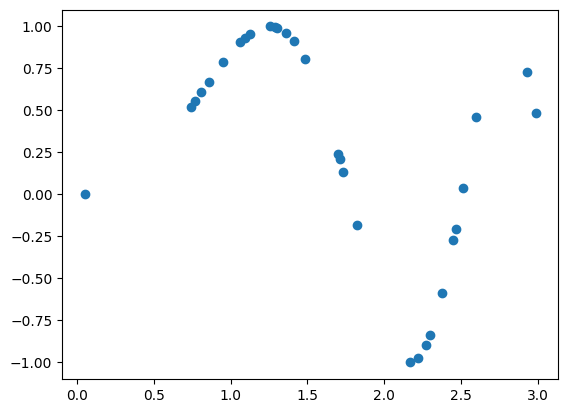

In [4]:
plt.scatter(x_i, f_i)
plt.show()

In [5]:
x_i

array([0.04980811, 0.74118599, 0.76694005, 0.80812407, 0.85743558,
       0.95288822, 1.06408208, 1.09667182, 1.12583208, 1.25622513,
       1.29252996, 1.30314072, 1.36071228, 1.41060267, 1.48347789,
       1.70326038, 1.71169464, 1.73359397, 1.82315724, 2.1695076 ,
       2.22152501, 2.27565563, 2.30087919, 2.37882791, 2.45139852,
       2.46553038, 2.51482677, 2.60027239, 2.93379899, 2.98685325])

In [6]:
def find_nearest_neghbors(x_i_array, n, x):
    neighbors = []

    n_right = n_left = n//2
    index_of_first_right_neighbor = bisect.bisect_right(x_i, x)
    if 0 <= index_of_first_right_neighbor <= len(x_i_array) - 1:
        neighbors.append((index_of_first_right_neighbor, x_i_array[index_of_first_right_neighbor]))

    while n_right != 0:
        index = index_of_first_right_neighbor + n_right
        if index <= len(x_i_array) - 1:
            neighbors.append((index, x_i[index]))
        n_right -= 1

    while n_left != 0:
        index = index_of_first_right_neighbor - n_left
        if index >= 0:
            neighbors.append((index, x_i[index]))
        n_left -= 1
    
    return neighbors

In [7]:
def P(x, x_j, neighbors):
    pi = 1
    for _, x_k in neighbors:
        if x_j != x_k:
            pi *= (x - x_k) / (x_j - x_k)

    return pi

In [8]:
x_i = np.sort(np.random.uniform(0, 3, 30))
f_i = sin_x_2(x_i)

# f_i with noise:
n_noise = 1
random_indices = np.random.randint(0, len(f_i), size=n_noise)
for i in random_indices:
    f_i[i] = np.random.uniform(-1, 1)

In [9]:
X = np.linspace(0, 3, 100)
n = 5

f_x = []
for x in X:
    summation = 0

    neighbors = find_nearest_neghbors(x_i, n, x)
    for j, x_j in neighbors:
        summation += f_i[j] * P(x, x_j, neighbors)

    f_x.append(summation)

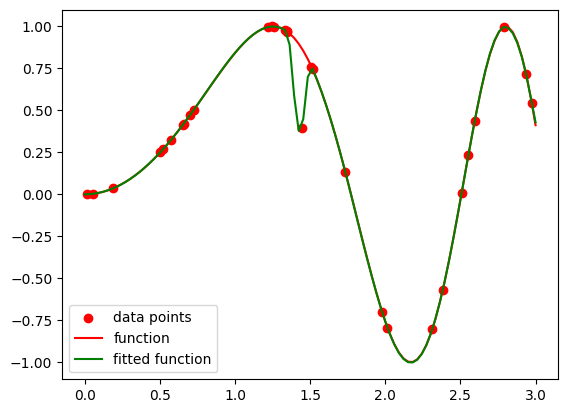

In [11]:
plt.scatter(x_i, f_i, c='red', label='data points')
plt.plot(X, sin_x_2(X), c='red', label='function')
plt.plot(X, f_x, c='green', label='fitted function')
plt.legend()
plt.show()